In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


In [77]:
df = pd.read_csv("C:/Users/janha/Desktop/MLE Lab/Assignment 6/heart+disease/processed.cleveland.csv",header=None)

df.head

df.info

<bound method DataFrame.info of        0    1    2      3      4    5    6      7    8    9    10   11   12  \
0    63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   
1    67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   
2    67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   
3    37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   
4    41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   
..    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...  ...  ...  ...   
298  45.0  1.0  1.0  110.0  264.0  0.0  0.0  132.0  0.0  1.2  2.0  0.0  7.0   
299  68.0  1.0  4.0  144.0  193.0  1.0  0.0  141.0  0.0  3.4  2.0  2.0  7.0   
300  57.0  1.0  4.0  130.0  131.0  0.0  0.0  115.0  1.0  1.2  2.0  1.0  7.0   
301  57.0  0.0  2.0  130.0  236.0  0.0  2.0  174.0  0.0  0.0  2.0  1.0  3.0   
302  38.0  1.0  3.0  138.0  175.0  0.0  0.0  173.0  0.0  0.0  1.0    ?  3.0   

     13  
0     0  

In [78]:
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df.columns = columns

df.replace("?", np.nan, inplace=True)

df.info

<bound method DataFrame.info of       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca tha

In [79]:
df["ca"] = pd.to_numeric(df["ca"], errors="coerce")
df["thal"] = pd.to_numeric(df["thal"], errors="coerce")

df.head

<bound method NDFrame.head of       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca  thal

In [80]:
X = df.drop("target", axis=1)
y = df["target"]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
clf = DecisionTreeClassifier(max_depth=4, ccp_alpha=0.01, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.01, max_depth=4, random_state=42)

In [86]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5573770491803278


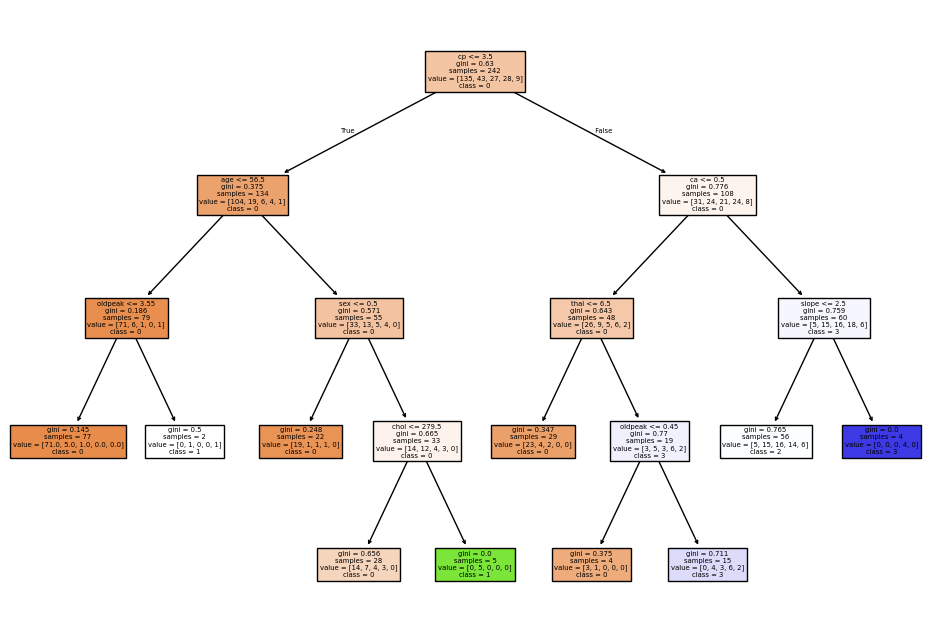

In [87]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=[str(i) for i in set(y)], filled=True)
plt.show()